# Building NN model including Recurrent NN for text data and structural data

In [5]:
import pandas as pd
import numpy as np


In [6]:


texts = ['name','space','description','notes','transit','access','interaction','house_rules','host_about']


df = pd.read_csv('/home/jbmai_sai/Documents/london/preprocess_3.csv')
for ind in df.index: 
    
    
    s = str(df['price'][ind])
    s1 = s.replace(',','')
    df['price'][ind] = s1

#df.drop(columns=['calendar_updated','state'],inplace = True)
df['price'] = df['price'].astype(float)

dfy = df['price']

# these columns are duplicates or same values
df.drop(columns=['calendar_updated','state','minimum_minimum_nights','maximum_maximum_nights','minimum_maximum_nights','maximum_nights_avg_ntm','price','has_availability_t','is_business_travel_ready_f'],inplace = True)



tex = np.zeros((9,83849,25),dtype=int)

i = 0
for s in texts:
    st = 'inputx_'+s+'.npy'
    path = '/home/jbmai_sai/Documents/london/'+st
    desc = np.load(path)
    tex[i,]=desc
    i=i+1
  
i=0

embeddings ={new_list: [] for new_list in texts}
lengths={new_list: [] for new_list in texts}
for s in texts:
    st = 'embeddings_'+s+'.npy'
    path = '/home/jbmai_sai/Documents/london/'+st
    desc = np.load(path)
    n = desc.shape[0]
    lengths[s] = n
    embeddings[s]=desc
    i=i+1

/home/jbmai_sai/anaconda3/envs/AI/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


# Textual data vocabulary size column wise

In [7]:
for i in texts:
    n = embeddings.get(i)
    
    print(n.shape)

(11685, 100)
(33633, 100)
(55635, 100)
(20179, 100)
(18909, 100)
(13855, 100)
(12960, 100)
(15846, 100)
(30693, 100)


# Training Data Normalization (MinMax norm)

In [8]:
df.drop(columns=['host_listings_count'],inplace = True)

dfx=((df-df.min())/(df.max()-df.min()))*10.0

cols = list(dfx.columns.values)
cols.sort() 
dfx = dfx[cols]

In [9]:
X = dfx.to_numpy()
y = dfy.to_numpy()
print(X.shape)
print(y.shape)

(83849, 99)
(83849,)


# Train and test data split

In [10]:

X_train = X[0:73001]
y_train = y[0:73001]

#X_val = X[65001:73001]
#y_val = y[65001:73001]

X_test = X[73001:]
y_test = y[73001:]


# Neural Network (MISO) model graph build and compile

In [19]:
from keras.models import Model
from keras.layers import Input,LSTM,Dense,Dropout
from keras.layers import Flatten,Concatenate
from keras.layers.embeddings import Embedding
from keras import regularizers
from keras.optimizers import SGD

import keras

length_long_sentence  = 25

deep_inputs_1 = Input(shape=(length_long_sentence,))
embedding_1 = Embedding(lengths.get('name'), 100, weights=[embeddings.get('name')], input_length=length_long_sentence, trainable=False)(deep_inputs_1) # line A
#flatten_1 = Flatten()(embedding_1)
flatten_1 = LSTM(32)(embedding_1)

deep_inputs_2 = Input(shape=(length_long_sentence,))
embedding_2 = Embedding(lengths.get('space'), 100, weights=[embeddings.get('space')], input_length=length_long_sentence, trainable=False)(deep_inputs_2) # line A
#flatten_2 = Flatten()(embedding_2)
flatten_2 = LSTM(32)(embedding_2)

deep_inputs_3 = Input(shape=(length_long_sentence,))
embedding_3 = Embedding(lengths.get('description'), 100, weights=[embeddings.get('description')], input_length=length_long_sentence, trainable=False)(deep_inputs_3) # line A
#flatten_3 = Flatten()(embedding_3)
flatten_3 = LSTM(32)(embedding_3)

deep_inputs_4 = Input(shape=(length_long_sentence,))
embedding_4 = Embedding(lengths.get('notes'), 100, weights=[embeddings.get('notes')], input_length=length_long_sentence, trainable=False)(deep_inputs_4) # line A
#flatten_4 = Flatten()(embedding_4)
flatten_4 = LSTM(32)(embedding_4)

deep_inputs_5 = Input(shape=(length_long_sentence,))
embedding_5 = Embedding(lengths.get('transit'), 100, weights=[embeddings.get('transit')], input_length=length_long_sentence, trainable=False)(deep_inputs_5) # line A
#flatten_5 = Flatten()(embedding_5)
flatten_5 = LSTM(32)(embedding_5)

deep_inputs_6 = Input(shape=(length_long_sentence,))
embedding_6 = Embedding(lengths.get('access'), 100, weights=[embeddings.get('access')], input_length=length_long_sentence, trainable=False)(deep_inputs_6) # line A
#flatten_6 = Flatten()(embedding_6)
flatten_6 = LSTM(32)(embedding_6)

deep_inputs_7 = Input(shape=(length_long_sentence,))
embedding_7 = Embedding(lengths.get('interaction'), 100, weights=[embeddings.get('interaction')], input_length=length_long_sentence, trainable=False)(deep_inputs_7) # line A
#flatten_7 = Flatten()(embedding_7)
flatten_7 = LSTM(32)(embedding_7)

deep_inputs_8 = Input(shape=(length_long_sentence,))
embedding_8 = Embedding(lengths.get('house_rules'), 100, weights=[embeddings.get('house_rules')], input_length=length_long_sentence, trainable=False)(deep_inputs_8) # line A
#flatten_8 = Flatten()(embedding_8)
flatten_8 = LSTM(32)(embedding_8)

deep_inputs_9 = Input(shape=(length_long_sentence,))
embedding_9 = Embedding(lengths.get('host_about'), 100, weights=[embeddings.get('host_about')], input_length=length_long_sentence, trainable=False)(deep_inputs_9) # line A
#flatten_9 = Flatten()(embedding_9)
flatten_9 = LSTM(32)(embedding_9)

features = Input(shape=(99,))
layer = Dense(99, activation='relu')(features)

merge = keras.layers.concatenate([layer, flatten_1,flatten_2, flatten_3, flatten_4, flatten_5,flatten_6,flatten_7, flatten_8, flatten_9])
#merge = keras.layers.concatenate([features, flatten_9])


layer1 = Dense(550, activation='relu')(merge)

#merge2 = keras.layers.concatenate([layer1,flatten_1, flatten_6,flatten_7])
layer2 = Dense(300, activation='relu')(layer1)
x1 = Dropout(0.2)(layer2)
layer3 = Dense(150, activation='relu')(x1)
x2 = Dropout(0.2)(layer3)
layer4 = Dense(25, activation='relu')(x2)

out = Dense(1, activation='relu')(layer4)

model = Model(inputs=[deep_inputs_1,deep_inputs_2,deep_inputs_3,deep_inputs_4,deep_inputs_5,deep_inputs_6,deep_inputs_7,deep_inputs_8,deep_inputs_9,features], outputs=out)
#model = Model(inputs=[deep_inputs_9,features], outputs=out)

sgd = SGD(lr=0.1, momentum=0.9)
model.compile(optimizer='adam', loss='mean_absolute_error')
#model.compile(optimizer=sgd, loss='mean_absolute_error')



# Model Graph Flow Visualization

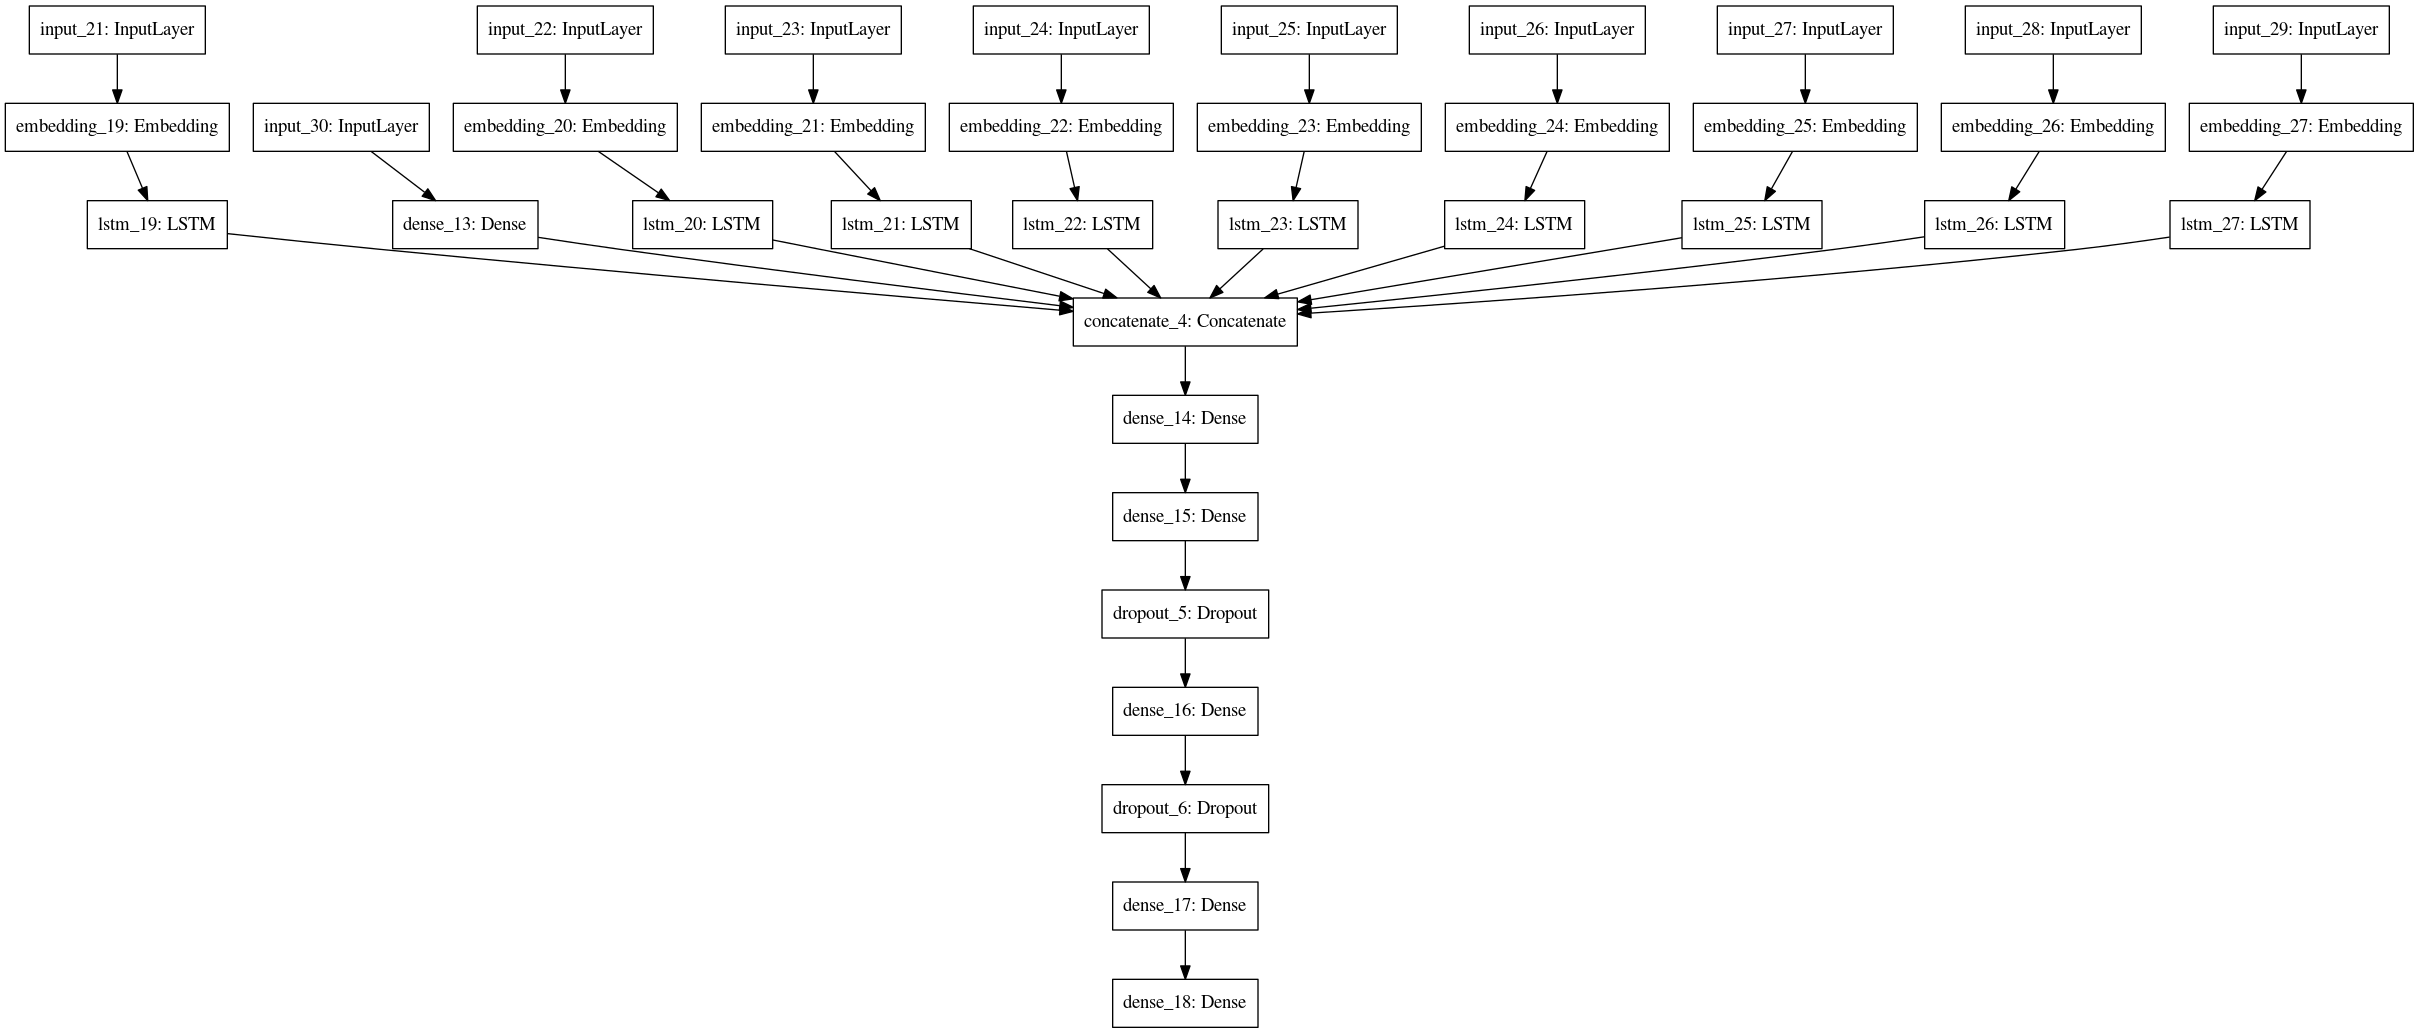

In [20]:
from keras.utils import plot_model
plot_model(model, to_file='/home/jbmai_sai/Documents/london/model1.png')

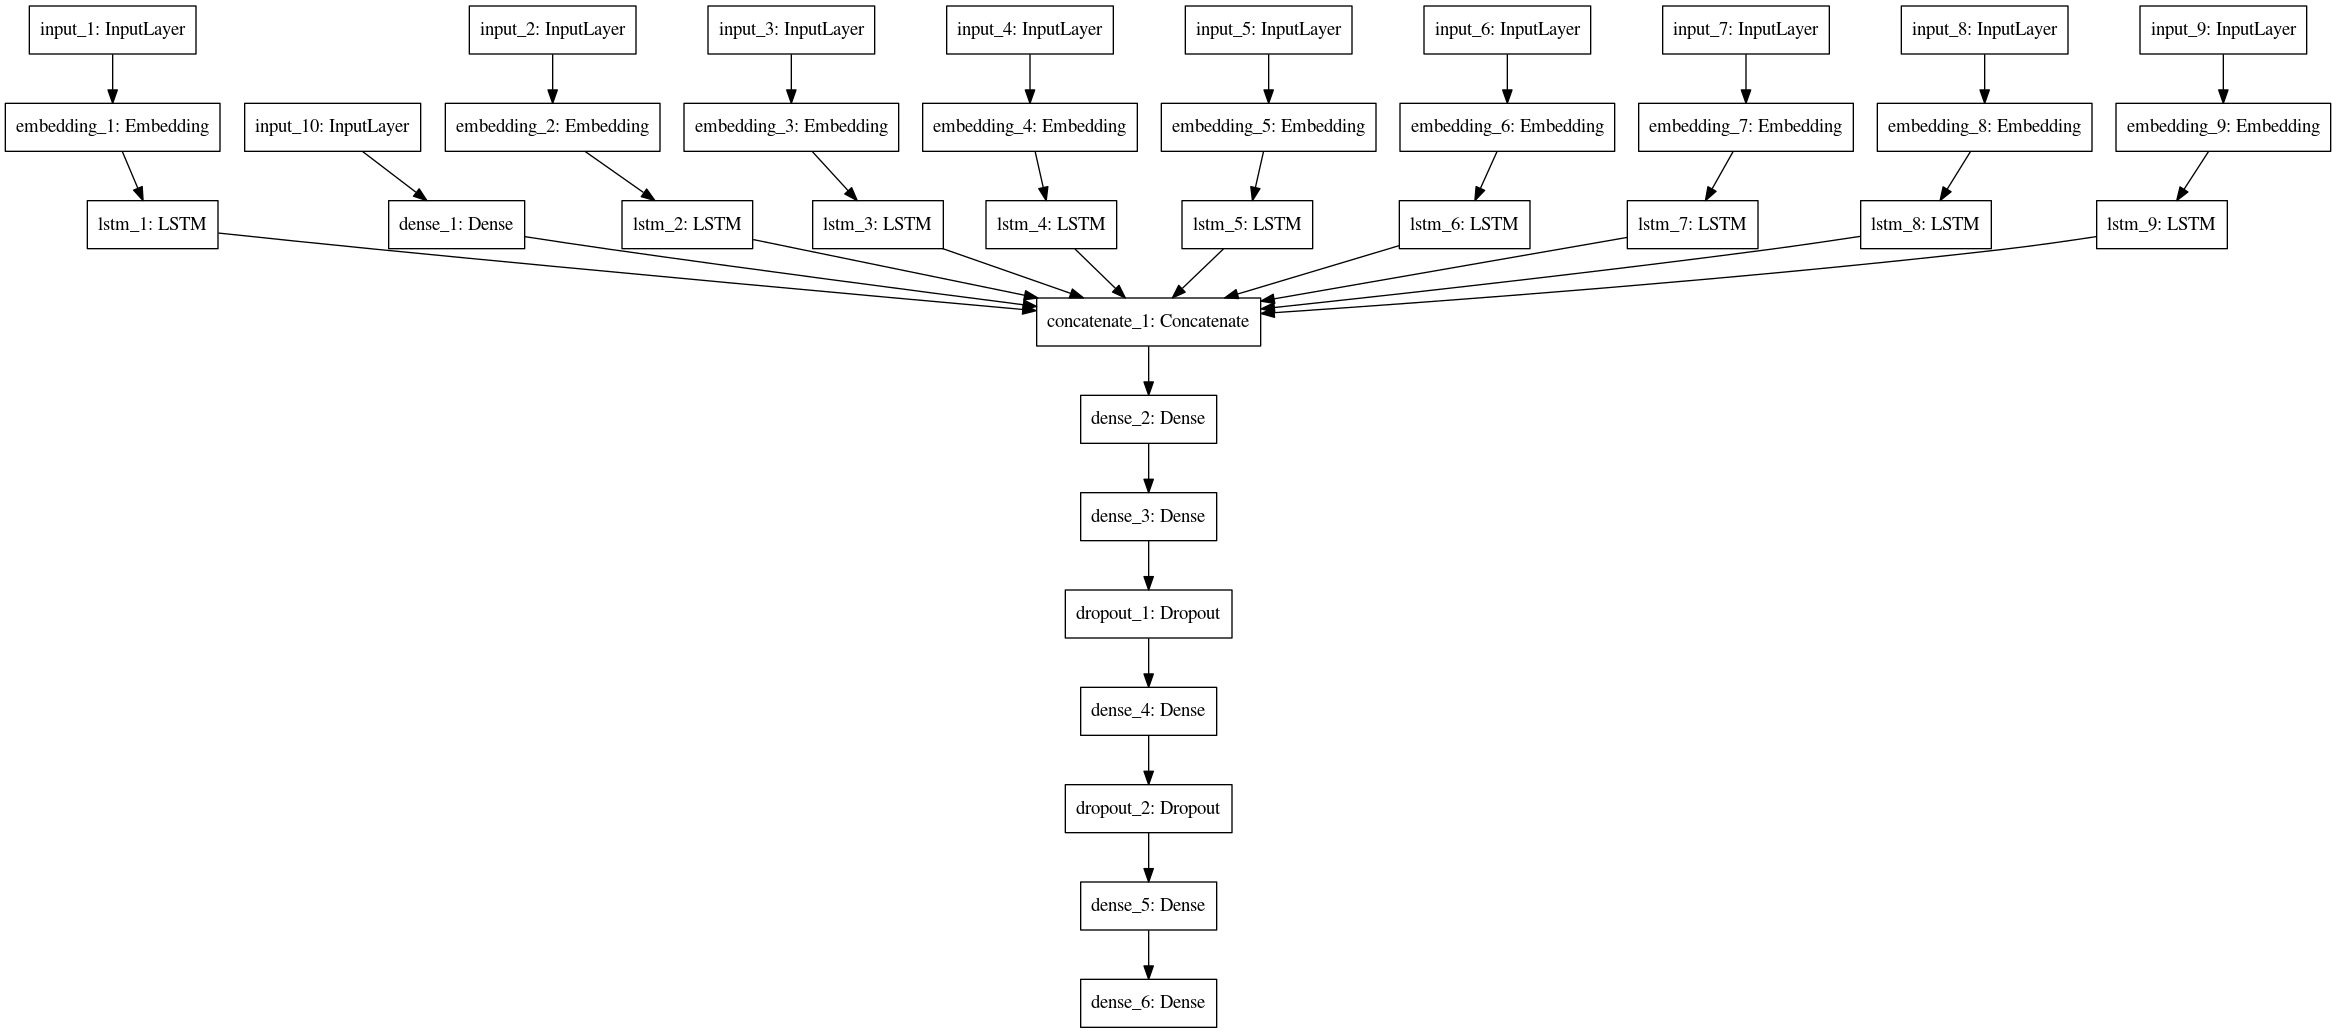

In [13]:
from keras.utils import plot_model
plot_model(model, to_file='/home/jbmai_sai/Documents/london/model.png')

# training the model with early-stopping Regularization and dropout with validation split

In [14]:
from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)
#train model
model.fit([tex[0,0:73001],tex[1,0:73001],tex[2,0:73001],tex[3,0:73001],tex[4,0:73001],tex[5,0:73001],tex[6,0:73001],tex[7,0:73001],tex[8,0:73001],X_train],y_train, batch_size = 256,validation_split=0.10, epochs=11, callbacks=[early_stopping_monitor])

W1127 22:39:24.749767 140594208057088 deprecation_wrapper.py:119] From /home/jbmai_sai/anaconda3/envs/AI/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 65700 samples, validate on 7301 samples
Epoch 1/11
65700/65700 [==============================] - 35s 538us/step - loss: 46.9712 - val_loss: 56.8161
Epoch 2/11
65700/65700 [==============================] - 32s 494us/step - loss: 38.2964 - val_loss: 53.5991
Epoch 3/11
65700/65700 [==============================] - 32s 488us/step - loss: 36.5724 - val_loss: 53.0682
Epoch 4/11
65700/65700 [==============================] - 32s 487us/step - loss: 35.6121 - val_loss: 53.8871
Epoch 5/11
65700/65700 [==============================] - 32s 488us/step - loss: 34.4647 - val_loss: 51.5375
Epoch 6/11
65700/65700 [==============================] - 32s 492us/step - loss: 33.4702 - val_loss: 51.8087
Epoch 7/11
65700/65700 [==============================] - 34s 519us/step - loss: 32.6754 - val_loss: 51.4422
Epoch 8/11
65700/65700 [==============================] - 37s 556us/step - loss: 31.8770 - val_loss: 51.5455
Epoch 9/11
65700/65700 [==============================] - 37s 561us/step - loss

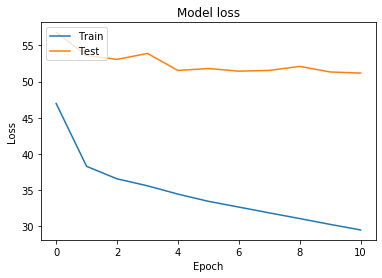

In [16]:
import matplotlib.pyplot as plt

history = model.history


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [17]:
model.save('/home/jbmai_sai/Documents/london/NN_model.h5')

# Model training loss and validation loss visualization

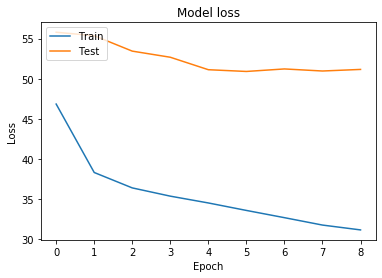

In [18]:
import matplotlib.pyplot as plt

history = model.history


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Inference on test dataset and evaluation metrices (MAE and R squared )

In [12]:
y_pred = model.predict([tex[0,73001:],tex[1,73001:],tex[2,73001:],tex[3,73001:],tex[4,73001:],tex[5,73001:],tex[6,73001:],tex[7,73001:],tex[8,73001:],X_test])

In [13]:
from sklearn.metrics import mean_absolute_error

print("Mean Absolute Error: " + str(mean_absolute_error(y_pred, y_test)))

Mean Absolute Error: 69.93494055747634


In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred) 

In [45]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_32 (InputLayer)           (None, 25)           0                                            
__________________________________________________________________________________________________
input_33 (InputLayer)           (None, 25)           0                                            
__________________________________________________________________________________________________
input_34 (InputLayer)           (None, 25)           0                                            
__________________________________________________________________________________________________
input_35 (InputLayer)           (None, 25)           0                                            
____________________________________________________________________________________________